# Business understanding
In today’s digital age, social media platforms like Twitter provide a massive amount of real-time insights into consumer opinions, especially regarding products and services. For tech giants like Apple and Google, monitoring sentiment around their products can be a crucial business strategy. Understanding how consumers feel about their offerings—whether positively, negatively, or neutrally—helps inform marketing strategies, product development, and customer support.

## Project overview
This project aims to build a Natural Language Processing (NLP) model to analyze the sentiment of Tweets specifically related to Apple and Google products. The dataset consists of over 9,000 tweets that have been rated by human annotators as positive, negative, or neutral in sentiment. The goal is to create an accurate machine learning model capable of classifying these tweets based on the emotional tone of the content.

The task is not just about automating sentiment analysis; it's about delivering actionable insights that can be used to understand customer feedback, inform decision-making processes, and possibly predict how future product releases might be received by consumers. By building a reliable sentiment analysis tool, businesses like Apple and Google can respond to customer feedback more effectively and refine their strategies accordingly.

## Business problem
Apple and Google are two of the most influential tech companies globally, with millions of users and customers who actively discuss their products on platforms like Twitter. However, manually analyzing sentiment in these discussions would be both time-consuming and impractical given the sheer volume of tweets. Therefore, automating sentiment analysis using an NLP model will allow both companies to process and understand consumer opinions quickly and at scale. This could give them a competitive edge by allowing for a timely response to customer feedback, identifying emerging issues, and improving customer satisfaction and brand loyalty

## Project objectives
### Main Objective

- The primary objective is to develop an NLP-based machine learning model that can accurately classify the sentiment of tweets related to Apple and Google products as positive, negative, or neutral.
### Specific Objectives



## Justification
Understanding sentiment at scale is critical for organizations in highly competitive industries like tech. By automating the analysis of millions of tweets related to Apple and Google products, companies can quickly gauge customer satisfaction, identify emerging trends, and proactively address negative sentiments. Sentiment analysis also allows these companies to measure the impact of new product releases, marketing campaigns, and public relations efforts.

## Questions 

# Data understanding

## Data Collection
The dataset for this project comes from [CrowdFlower](https://data.world/crowdflower/brands-and-product-emotions) and contains over 9,000 tweets labeled with sentiment (positive, negative, or neutral). These labeled examples provide a training set to build and evaluate the sentiment classification model. The data is enriched with various features such as tweet text, tweet ID, user ID, and the sentiment label, which is crucial for training the model.

To further improve the model, external data such as newer tweets about Apple and Google products or additional labeled sentiment datasets might be useful for retraining or fine-tuning.

### Load libraries

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import json
import emoji
import string
import warnings 
from nltk import FreqDist
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('wordnet')

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Mich\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Load the data

In [43]:
df = pd.read_csv("data/tweet_product_company.csv", encoding="latin-1")
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [44]:
df.tail()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product
9092,Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...,NaN,No emotion toward brand or product


In [45]:
df.sample(5)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
8359,Last minute flight change to #sxsw means I can...,iPad,Positive emotion
2601,sure to be a total scene! RT @mention Just spo...,Apple,Positive emotion
2357,#saveustechies panel at #sxsw getting off to a...,Google,Positive emotion
3332,@mention Google Circles will be widely publici...,NaN,No emotion toward brand or product
6505,RT @mention RT @mention Apple alignd 2 big tec...,NaN,No emotion toward brand or product


#  Data cleaning

## Correct formats

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


- **tweet_text**: The data type `object` is appropriate as it contains text data.
- **emotion_in_tweet_is_directed_at**: The `object` type is suitable since it likely contains categorical or string values indicating emotion direction.
- **is_there_an_emotion_directed_at_a_brand_or_product**: The `object` type is correct as it likely holds categorical values (e.g., "Yes" or "No").


All columns have the correct data type (`object`) for their respective content.

## Missing Values

In [47]:
df.isna().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

- The dataset has a total of 9093 rows.
- The **tweet_text** is the primary feature and is almost complete.
- The other two features have missing values and might require further preprocessing before use in sentiment analysis or classification tasks.



Removing rows with the missing value in **tweet_text** 

In [48]:
df.dropna(subset=["tweet_text"],inplace=True)
df.isna().sum()

tweet_text                                               0
emotion_in_tweet_is_directed_at                       5801
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

Replacing missing values on column **emotion_in_tweet_is_directed_at** with `'Unknown'`

In [49]:
product_names = df.emotion_in_tweet_is_directed_at.unique()
df.emotion_in_tweet_is_directed_at.fillna("Unknown",inplace=True)
df.isna().sum() 

tweet_text                                            0
emotion_in_tweet_is_directed_at                       0
is_there_an_emotion_directed_at_a_brand_or_product    0
dtype: int64

Keeping the original text

In [50]:
df["original_tweet"]= df.tweet_text

## Feature Engineering

### Lowercasing
Convert all `tweet_text` to lowercase to maintain consistency

In [51]:
df.tweet_text = df.tweet_text.str.lower()

**Converting Transcript to strings**

In [52]:
def transcription_to_strings(df): 
    # matches basic sad face :(, :-(
    sad_face = re.compile(r'[:;8]?[\'\-]?\([/\\]')  
    
    # matches crying face :'(, :'-(
    crying_face = re.compile(r'[:;8]?[\'\-]?\'\(')  
    
    # matches complex sad faces with slashes, tears, etc.
    complex_sad_face = re.compile(r'[:;8]?[\'\-]?\([/\\]\)?')  
    
    # edge case: faces with tears or creative symbols like T_T, TT_TT
    crying_edge_case = re.compile(r'(T_T|tt_t|TT_TT)')
    
    # apply pattern replacement across the DataFrame's text column
    df['tweet_text'] = df['tweet_text'].apply(lambda x: 
        crying_edge_case.sub('crying face', 
        complex_sad_face.sub('complex sad face', 
        crying_face.sub('crying face', 
        sad_face.sub('sad face', x)))))

transcription_to_strings(df)
    

**Dealing with emojis**

In [53]:
for index in range(df.tweet_text.shape[0]):
    df.tweet_text.iloc[index] = emoji.demojize(df.tweet_text.iloc[index])

**Replacing abbreviation with its full form**

In [54]:
# loading abbreviation dictionary from abbr.txt
with open('abbr.txt', 'r') as file:
    abbr_dict = json.load(file)

# expand abbreviations in a tweet
def expand_abbr_in_tweet(text):
    return " ".join([abbr_dict.get(word, word) for word in text.split()])

# apply the function to each tweet in the DataFrame
df['tweet_text'] = df['tweet_text'].apply(expand_abbr_in_tweet)

### Removing Links
First check if there is any links

In [55]:
def text_processor(process, pattern):   
    def extract_pattern(text):
        return re.findall(pattern, text)

    # apply pattern extraction
    links_list = df['tweet_text'].apply(extract_pattern)
    
    # flatten the list of lists
    all_links = [link for sublist in links_list for link in sublist]

    # check if anything was found
    if all_links:
        print(f"{process} found in the dataset: {len(all_links)} matches")
        print(all_links[:5])  # optional: show a few samples
    else:
        print(f"No {process} found.")

In [56]:
def remove_pattern(pattern):
    df['tweet_text'] = df['tweet_text'].apply(lambda x: re.sub(pattern, '', x))

In [57]:
to_remove_or_check = "Links"
pattern = r'http\S+|www\S+'
text_processor(to_remove_or_check,pattern)

Links found in the dataset: 48 matches
['http://ht.ly/49n4m', 'http://bit.ly/ieavob', 'http://bit.ly/gvlrin', 'http://j.mp/grn7pk)', 'http://bit.ly/axzwxb']


Removing links found

In [58]:
remove_pattern(pattern)

Checking if any links are remaining

In [59]:
text_processor(to_remove_or_check,pattern)

No Links found.


**Removing Usernames**

Checking for twitter usernames

In [60]:
to_remove_or_check = "Usernames"
pattern = r'@\S+'
text_processor(to_remove_or_check,pattern)

Usernames found in the dataset: 7192 matches
['@wesley83', '@jessedee', '@fludapp', '@swonderlin', '@sxsw']


Removing Usernames

In [61]:
remove_pattern(pattern)

Checking if any usernames are remaining


In [62]:
text_processor(to_remove_or_check,pattern)

No Usernames found.


**Removing Hashtags**

Let us first check if there is any hashtags

In [63]:
to_remove_or_check = "Hashtags"
pattern = r'#\S+'
text_processor(to_remove_or_check,pattern)

Hashtags found in the dataset: 15854 matches
['#rise_austin,', '#sxsw.', '#sxsw', '#ipad', '#sxsw.']


Removing hashtags

In [64]:
remove_pattern(pattern)

In [65]:
text_processor(to_remove_or_check,pattern)

No Hashtags found.


**Removing Stopwords**

In [66]:
stopwords_list = stopwords.words('english')  # Getting stopwords from NLTK

# converting all product names to lowercase
product_names= [str(name).lower() for name in product_names if not pd.isna(name)]
# extending the list with lowercase product names
stopwords_list.extend(product_names)

for index in range(df.tweet_text.shape[0]):
    tweet_text = df.tweet_text.iloc[index].split()
    tweet_no_stopword = " ".join([word for word in tweet_text if word not in stopwords_list])
    df.tweet_text.iloc[index] = tweet_no_stopword

In [67]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,original_tweet
0,. 3g iphone. 3 hrs tweeting dead! need upgrade...,iPhone,Negative emotion,.@wesley83 I have a 3G iPhone. After 3 hrs twe...
1,know ? awesome ipad/iphone application likely ...,iPad or iPhone App,Positive emotion,@jessedee Know about @fludapp ? Awesome iPad/i...
2,wait 2 also. sale,iPad,Positive emotion,@swonderlin Can not wait for #iPad 2 also. The...
3,hope year's festival crashy year's app.,iPad or iPhone App,Negative emotion,@sxsw I hope this year's festival isn't as cra...
4,"great stuff fri marissa mayer (google), tim o'...",Google,Positive emotion,@sxtxstate great stuff on Fri #SXSW: Marissa M...


**Removing Punctuation**

In [68]:
# function to remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# applying the function to the tweet_text column
df['tweet_text'] = df['tweet_text'].apply(remove_punctuation)

**Removing Numbers**

Checking if there is any numbers if so remove

In [69]:
to_remove_or_check = "Numbers"
pattern = r'\b\d+\b'
text_processor(to_remove_or_check,pattern)

Numbers found in the dataset: 2421 matches
['3', '2', '21', '30', '3']


In [70]:
remove_pattern(pattern)

In [71]:
text_processor(to_remove_or_check,pattern)

No Numbers found.


### Tokenization

In [32]:
for index in range(df.tweet_text.shape[0]):
    df.tweet_text.iloc[index] = word_tokenize(df.tweet_text.iloc[index])

In [33]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,original_tweet
0,"[3g, iphone, hrs, tweeting, dead, need, upgrad...",iPhone,Negative emotion,.@wesley83 I have a 3G iPhone. After 3 hrs twe...
1,"[know, awesome, ipadiphone, application, likel...",iPad or iPhone App,Positive emotion,@jessedee Know about @fludapp ? Awesome iPad/i...
2,"[wait, also, sale]",iPad,Positive emotion,@swonderlin Can not wait for #iPad 2 also. The...
3,"[hope, years, festival, crashy, years, app]",iPad or iPhone App,Negative emotion,@sxsw I hope this year's festival isn't as cra...
4,"[great, stuff, fri, marissa, mayer, google, ti...",Google,Positive emotion,@sxtxstate great stuff on Fri #SXSW: Marissa M...


### Lemmatization

In [34]:
lemmatizer = WordNetLemmatizer()

for index in range(df.tweet_text.shape[0]):
    text = df.tweet_text.iloc[index] 
    tweet_text =[lemmatizer.lemmatize(word) for word in text]
    df.tweet_text.iloc[index] = tweet_text

In [35]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,original_tweet
0,"[3g, iphone, hr, tweeting, dead, need, upgrade...",iPhone,Negative emotion,.@wesley83 I have a 3G iPhone. After 3 hrs twe...
1,"[know, awesome, ipadiphone, application, likel...",iPad or iPhone App,Positive emotion,@jessedee Know about @fludapp ? Awesome iPad/i...
2,"[wait, also, sale]",iPad,Positive emotion,@swonderlin Can not wait for #iPad 2 also. The...
3,"[hope, year, festival, crashy, year, app]",iPad or iPhone App,Negative emotion,@sxsw I hope this year's festival isn't as cra...
4,"[great, stuff, fri, marissa, mayer, google, ti...",Google,Positive emotion,@sxtxstate great stuff on Fri #SXSW: Marissa M...


#  Analysis

## Univariate analysis

In [73]:
tokens = []
for index in range(df.tweet_text.shape[0]):
    text=df.tweet_text.iloc[index]
    for word in text:tokens.append(word)
# creating frequency distribution from the tokens
freqdist = FreqDist(tokens)

# getting 200 most common words  
most_common = freqdist.most_common(200)

print(most_common)

[(' ', 76093), ('e', 55756), ('t', 36806), ('i', 33430), ('o', 32936), ('a', 32750), ('n', 32736), ('s', 30090), ('r', 27036), ('l', 24687), ('p', 17440), ('c', 16183), ('d', 14062), ('g', 13385), ('u', 13295), ('w', 11493), ('m', 10877), ('h', 10533), ('k', 10216), ('y', 8033), ('b', 5909), ('f', 4889), ('v', 4522), ('q', 2122), ('x', 1678), ('j', 921), ('z', 613), ('\x89', 582), ('2', 479), ('û', 473), ('0', 314), ('1', 300), ('3', 228), ('ï', 216), ('5', 209), ('6', 195), ('4', 165), ('9', 131), ('8', 99), ('ª', 94), ('÷', 88), ('7', 65), ('\x9d', 49), ('¼', 40), ('\x8b', 37), ('ã', 34), ('å', 34), ('ó', 29), ('ò', 26), ('ì', 23), ('\x81', 23), ('ê', 20), ('â', 12), ('á', 11), ('ç', 11), ('è', 7), ('\x8d', 7), ('¢', 6), ('ä', 6), ('ü', 5), ('\x8f', 5), ('¡', 4), ('î', 4), ('ë', 4), ('£', 3), ('¾', 3), ('ð', 3), ('\x8a', 3), ('\x84', 2), ('«', 2), ('»', 2), ('ù', 2), ('ô', 2), ('¤', 2), ('ö', 2), ('\x8c', 2), ('ý', 2), ('à', 2), ('µ', 1), ('\x95', 1), ('¬', 1), ('´', 1), ('\x80', 1),

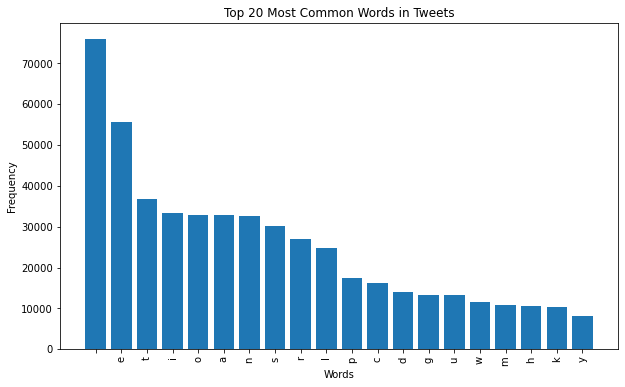

In [74]:
#  top 20 most common words for visualization
top_20 = freqdist.most_common(20)

# splitting the words and their frequencies into separate lists
words, frequencies = zip(*top_20)

plt.figure(figsize=(10, 6))
plt.bar(words, frequencies)
plt.xticks(rotation=90) 
plt.title('Top 20 Most Common Words in Tweets')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

<IPython.core.display.Javascript object>

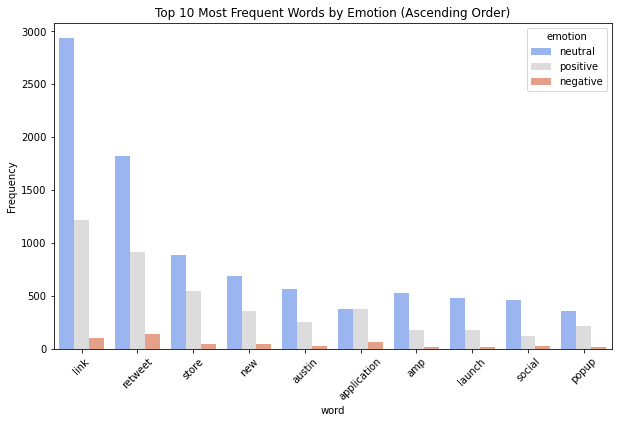

In [39]:
word_emotion_counts = {}

# iterating through each tweet
for index in range(df.shape[0]):
    text = df.tweet_text.iloc[index]
    emotion = df.is_there_an_emotion_directed_at_a_brand_or_product.iloc[index]  

    for word in text:  
        if word not in word_emotion_counts:
            word_emotion_counts[word] = [0, 0, 0]  # [neutral, positive, negative]

        if emotion == 'No emotion toward brand or product':
            word_emotion_counts[word][0] += 1
        elif emotion == 'Positive emotion':
            word_emotion_counts[word][1] += 1
        elif emotion == 'Negative emotion':
            word_emotion_counts[word][2] += 1
            
word_emotion_counts
emotion_data = []
for word, counts in word_emotion_counts.items():
    emotion_data.append({'word': word, 'neutral': counts[0], 'positive': counts[1], 'negative': counts[2]})

emotion_df = pd.DataFrame(emotion_data)

# getting the top 10 words by frequency (neutral + positive + negative counts)
top_words = emotion_df.set_index('word').sum(axis=1).nlargest(10).index
top_words_df = emotion_df[emotion_df['word'].isin(top_words)]

# reshape the dataFrame for plotting
top_words_melted = top_words_df.melt(id_vars='word', value_vars=['neutral', 'positive', 'negative'], 
                                     var_name='emotion', value_name='count')

# bar plot with hue for emotion
plt.figure(figsize=(10, 6))
sns.barplot(x='word', y='count', hue='emotion', data=top_words_melted, palette='coolwarm', 
            order=top_words)  
plt.title('Top 10 Most Frequent Words by Emotion (Ascending Order)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [40]:
df.is_there_an_emotion_directed_at_a_brand_or_product.unique()

array(['Negative emotion', 'Positive emotion',
       'No emotion toward brand or product', "I can't tell"], dtype=object)

<IPython.core.display.Javascript object>

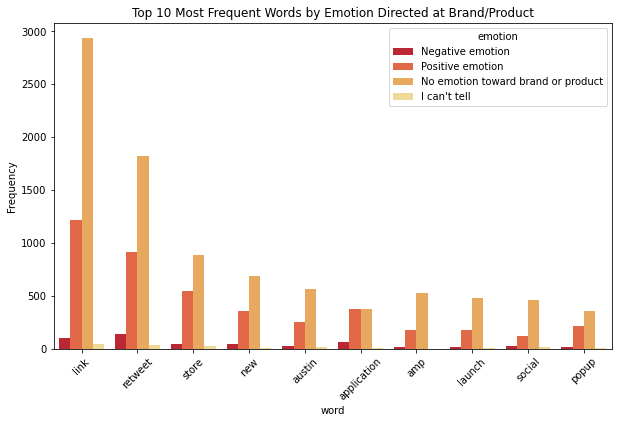

In [41]:
# empty dictionary for word counts by emotion
word_emotion_counts = {}

# get the unique values for brands
emotion_values = df['is_there_an_emotion_directed_at_a_brand_or_product'].unique()

for index in range(df.shape[0]):
    text = df.tweet_text.iloc[index]
    emotion = df['is_there_an_emotion_directed_at_a_brand_or_product'].iloc[index]  

     
    for word in text:
        if word not in word_emotion_counts:
            word_emotion_counts[word] = {emotion: 0 for emotion in emotion_values}  # initializing for each emotion

        # increment the word count for the specific emotion
        word_emotion_counts[word][emotion] += 1

# create dataFrame from the word_emotion_counts dictionary
emotion_data = []
for word, counts in word_emotion_counts.items():
    emotion_data.append({'word': word, **counts})

emotion_df = pd.DataFrame(emotion_data)

# Get the top 10 words by total frequency across all emotions
top_words = emotion_df.set_index('word').sum(axis=1).nlargest(10).index
top_words_df = emotion_df[emotion_df['word'].isin(top_words)]

# Reshape the DataFrame for plotting
top_words_melted = top_words_df.melt(id_vars='word', value_vars=emotion_values, 
                                     var_name='emotion', value_name='count')

# Create a bar plot with hue for emotion
plt.figure(figsize=(10, 6))
sns.barplot(x='word', y='count', hue='emotion', data=top_words_melted, palette='YlOrRd_r', 
            order=top_words)  # Ensure words are ordered in ascending order
plt.title('Top 10 Most Frequent Words by Emotion Directed at Brand/Product')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Preprocessing

# Modeling

# Conclusion